<a href="https://colab.research.google.com/github/prajwal-ky22/Data-Science-Algorithms/blob/main/Big_mart_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/prajwal-ky22/Data-Science-Algorithms/main/Big%20Mart%20Sales%20Prediction/train_v9rqX0R.csv')

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/prajwal-ky22/Data-Science-Algorithms/main/Big%20Mart%20Sales%20Prediction/test_AbJTz2l.csv')

In [ ]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('median'), inplace = True)

In [ ]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train[train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [ ]:
train.loc[train['Item_Identifier'] == "FDN52"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [ ]:
train.loc[train['Item_Identifier'] == "FDK57"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [ ]:
train.loc[train['Item_Identifier'] == "FDE52"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046


In [ ]:
train.loc[train['Item_Identifier'] == "FDQ60"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [ ]:
train['Item_Weight'].fillna(train.groupby('Item_Type')['Item_Weight'].transform('median'), inplace = True)

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test['Item_Weight'].fillna(test.groupby('Item_Identifier')['Item_Weight'].transform('median'), inplace = True)

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test['Item_Weight'].fillna(test.groupby('Item_Type')['Item_Weight'].transform('median'), inplace = True)

In [ ]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [ ]:
test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
test['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [ ]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
test['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [ ]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
test['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [ ]:
test['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [ ]:
test['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [ ]:
import seaborn as sns               
import matplotlib.pyplot as plt   
%matplotlib inline

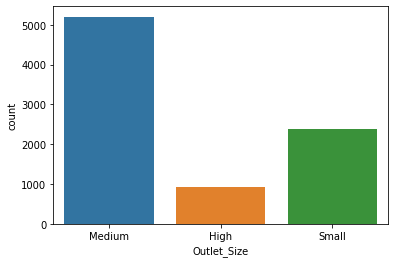

In [ ]:
sns.countplot(x='Outlet_Size' , data=train)
#Majority of the outlets are medium sized

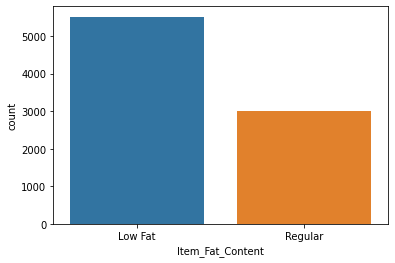

In [ ]:
sns.countplot(x='Item_Fat_Content' , data=train)


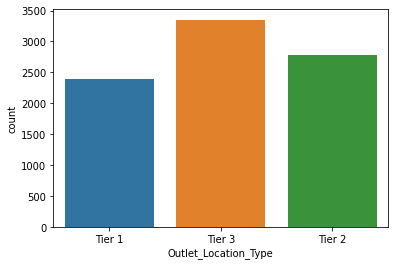

In [ ]:
sns.countplot(x='Outlet_Location_Type' , data=train)

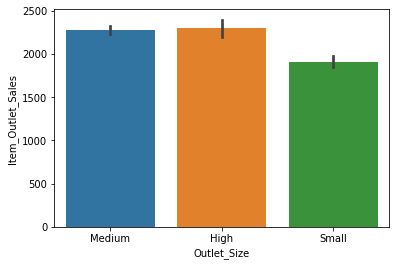

In [ ]:
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)

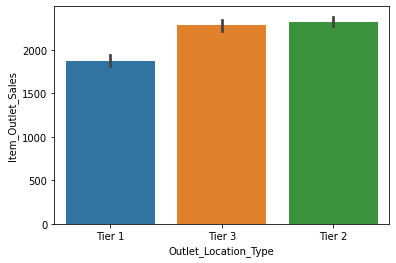

In [ ]:
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)

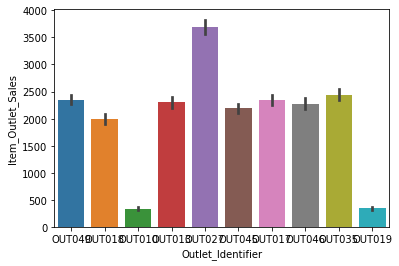

In [ ]:
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train)

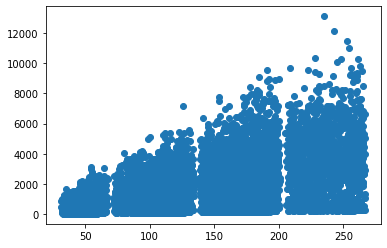

In [ ]:
 plt.scatter(x='Item_MRP', y='Item_Outlet_Sales', data=train)

In [ ]:
#Majority of the outlets are medium sized
#Low fat items are most sold
#Maximum outlets are in Tier 3 cities
#sales of mediumn and high size outlets are almost equal.
#sales in tier 2 and 3 are almost equal.
#Items with higher MRP contribute to maximum sales

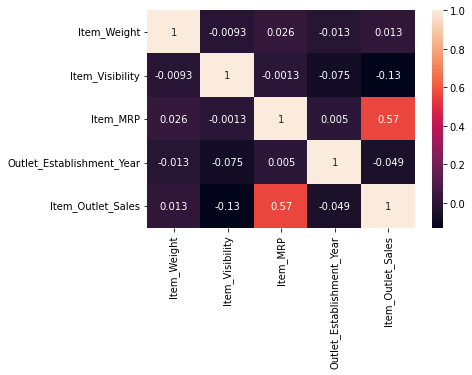

In [ ]:
sns.heatmap(train.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


In [ ]:
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
train = pd.get_dummies(train, columns=['Item_Type','Outlet_Type'])
test = pd.get_dummies(test, columns=['Item_Type','Outlet_Type'])

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,1,0,3735.1380,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009,1,2,443.4228,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999,1,0,2097.2700,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1998,1,2,732.3800,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,1987,0,2,994.7052,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750,0,0.007565,107.8622,OUT049,1999,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,FDW14,8.300,1,0.038428,87.3198,OUT017,2007,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,NCN55,14.600,0,0.099575,241.7538,OUT010,1998,1,2,0,...,0,1,0,0,0,0,1,0,0,0
3,FDQ58,7.315,0,0.015388,155.0340,OUT017,2007,1,1,0,...,0,0,0,1,0,0,0,1,0,0
4,FDY38,13.600,1,0.118599,234.2300,OUT027,1985,1,2,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Dropping irrelevant columns
train  = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression


In [ ]:
Y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 1)

In [ ]:
LR = LinearRegression(normalize=True)

In [ ]:
LR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
Y_predict = LR.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_squared_error(Y_test, Y_predict)

1271067.2024220761

In [ ]:
mean_absolute_error(Y_test, Y_predict)

836.0369108080363

In [ ]:
r2_score(Y_test, Y_predict)

0.5599467316155473